<a href="https://colab.research.google.com/github/1boge/my_repos/blob/master/Logres_affair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Модели разной сложности совершают разны ошибки обучения и ошибки обобщения

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [3]:
import pandas as pd

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/1boge/my_repos/master/affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Формируем набор признаков и целевую переменную

In [12]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [13]:
Y = data['affair']

In [14]:
model = LogisticRegression()
model_tree = DecisionTreeClassifier()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [16]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Получаем прогнозные значения модели (переменная predictions)

In [18]:
predictions = model.predict_proba(X_test)

In [19]:
predictions[:2]

array([[0.37442486, 0.62557514],
       [0.92523133, 0.07476867]])

In [20]:
model.score(X_train, Y_train)

0.7235188509874326

In [21]:
model.score(X_test, Y_test)

0.7319371727748691

In [22]:
model_tree.score(X_train, Y_train)

0.9497307001795332

In [23]:
model_tree.score(X_test, Y_test)

0.6518324607329843

### Оценка качества модели

Считаем accuracy последней модели

In [24]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [25]:
pred = model.predict(X_test)

In [26]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [27]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [28]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [29]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [30]:
from sklearn.metrics import recall_score, precision_score

In [31]:
recall_score(Y_test, pred)

0.3723228995057661

In [32]:
precision_score(Y_test, pred)

0.6330532212885154

### ROC

In [33]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [34]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [35]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9292091223891046)
(0.0, 0.0016474464579901153, 0.9292091223891046)
(0.0, 0.008237232289950576, 0.8999886296793331)
(0.0007674597083653108, 0.008237232289950576, 0.8977304739459553)
(0.0007674597083653108, 0.019769357495881382, 0.8650840076140701)
(0.0030698388334612432, 0.019769357495881382, 0.85471299581309)
(0.0030698388334612432, 0.023064250411861616, 0.8544826989864462)
(0.003837298541826554, 0.023064250411861616, 0.8521926971764641)
(0.003837298541826554, 0.03130148270181219, 0.8338303364782959)
(0.004604758250191865, 0.03130148270181219, 0.833607318350775)


In [36]:
import  matplotlib.pyplot as plt

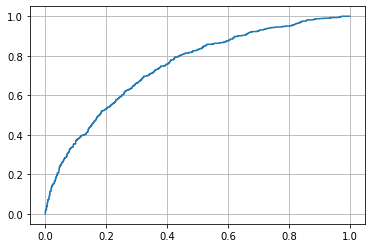

In [37]:
plt.plot( fpr, tpr )
plt.grid()

**Построим еще одну модель и сравним их между собой**

In [38]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [39]:
model2 = LogisticRegression()

In [40]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [41]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predictions2 = model2.predict_proba( X_test_short )

In [43]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

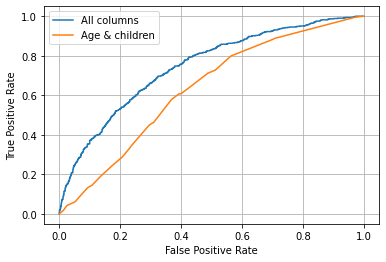

In [44]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()


**Посчитаем площадь под ROC-кривой для двух моделей**

In [45]:
from sklearn.metrics import roc_curve

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7451629176618145

In [48]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [49]:
from sklearn.metrics import auc

In [50]:
auc( fpr, tpr )

0.7451629176618145

In [51]:
auc( fpr2, tpr2 )

0.6311452091928271

### Используем готовые библиотеки

In [52]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [53]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [54]:
pr.shape, thres.shape

((1669,), (1668,))

In [55]:
# посмотрим что получилось
for line in zip( pr[:10], re[:10], thres[:10] ):
    print( line )

(0.32338838572189665, 1.0, 0.07582923251103321)
(0.3230277185501066, 0.9983525535420099, 0.07617596157571913)
(0.3232, 0.9983525535420099, 0.07800501586816877)
(0.3233724653148346, 0.9983525535420099, 0.07833731223692608)
(0.32354511478910836, 0.9983525535420099, 0.07858652846139304)
(0.32371794871794873, 0.9983525535420099, 0.07969132533406419)
(0.3238909673971138, 0.9983525535420099, 0.07987106574004733)
(0.3240641711229946, 0.9983525535420099, 0.0803136757027235)
(0.32423756019261635, 0.9983525535420099, 0.08053860905221413)
(0.3238758029978587, 0.9967051070840197, 0.08068797247400258)


(0.0, 1.0)

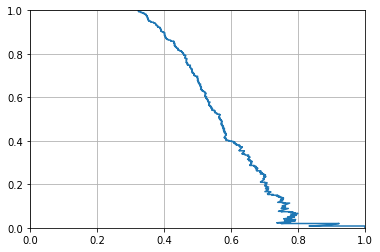

In [56]:
plt.plot(pr,re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [57]:
from sklearn.metrics import average_precision_score

In [58]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5761322026533253

### Разные разбиения -> разные результаты

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [59]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train, cv=7)
scores.mean(), scores

(0.7273315504928904,
 array([0.72684458, 0.711146  , 0.74568289, 0.73626374, 0.70754717,
        0.72484277, 0.73899371]))

In [61]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=9)

scores = cross_val_score(model, X_train, Y_train, cv=kf)

scores.mean(), scores

(0.7248642337352015,
 array([0.72983871, 0.72121212, 0.71313131, 0.73535354, 0.72929293,
        0.72525253, 0.71111111, 0.72929293, 0.72929293]))

In [62]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=9)

scores = cross_val_score(model, X_train, Y_train, cv=skf)

scores.mean(), scores

(0.7244157525071504,
 array([0.72782258, 0.74343434, 0.68686869, 0.75151515, 0.72525253,
        0.70707071, 0.71111111, 0.74141414, 0.72525253]))

## Пример влияния L1 и L2-регуляризации

In [63]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [64]:
model2 = LogisticRegression( penalty = 'l2', C = 0.1, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [65]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [66]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

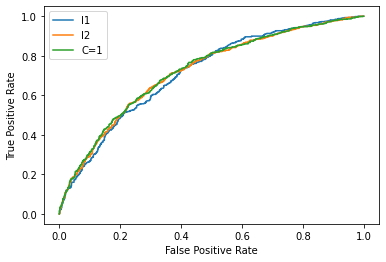

In [67]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [68]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [69]:
Y = data['affair']

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [71]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.1, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [72]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [73]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

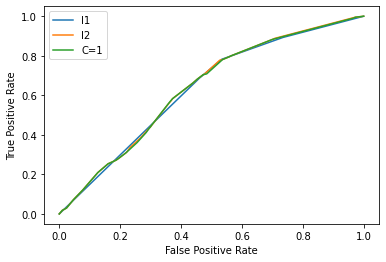

In [74]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()